In [23]:
import pandas as pd
pd.__version__

'0.25.3'

In [24]:
ts = pd.DataFrame(pd.read_csv('bookings_df_29_02.csv', header=0, parse_dates=['Date'], index_col=1,encoding = 'unicode_escape', squeeze=True).iloc[::-1]['bookings'])
#ts = ts.iloc[:-1, :]
ts['weekday'] = ts.index.weekday
ts.tail()

,bookings,weekday
Date,,
2020-02-26,223.0003,2
2020-02-27,263.0005,3
2020-02-28,310.9999,4
2020-02-29,335.0001,5
2020-03-01,2.0000,6


In [25]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [26]:
df_weekdays = {}
for ind, weekday in enumerate(weekdays):
    
    df_weekdays[weekday] = pd.DataFrame(ts.groupby('weekday').bookings).iloc[ind,1].values
    

In [27]:
df_weekdays

{'Monday': array([ 83.    ,  57.    ,  68.    ,  69.    ,  63.    ,  62.    ,
        107.    ,  92.    ,  87.    ,  85.    ,  99.    ,  55.    ,
         68.0001, 107.    ,  76.    , 105.    ,  91.    , 117.    ,
        137.    ,  93.    , 168.    , 157.    , 102.    , 129.    ,
        152.    , 179.    , 172.    , 160.    , 207.    , 126.    ,
        137.    , 145.    , 140.0002, 145.0003, 150.0001, 103.0002,
         84.0001, 126.    , 102.0001, 101.0004, 107.0002, 101.0003,
        169.0002, 123.0001,  92.0003,  97.0003, 125.0003, 116.0001,
        152.0001, 117.0003, 155.    ,  61.0004, 131.0004,  76.    ,
         78.    ,  91.    , 101.0001, 121.9998, 127.0002, 175.0001,
        122.0002, 153.    , 152.0002, 159.0002, 193.0001, 181.    ,
        273.0001, 258.0005, 294.0001, 244.0002, 276.9999, 240.0006,
        312.0002, 338.0008, 360.9999, 344.0004, 359.0003, 341.0005,
        408.0001, 428.0006, 436.0005, 355.0003, 421.9996, 454.0006,
        465.0005, 438.0006, 460.0004, 

In [28]:
df = pd.DataFrame(df_weekdays)
df

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,83.0000,117.0000,93.0000,78.0000,81.0000,90.0000,90.0000
1,57.0000,46.0000,59.0000,75.0000,67.0000,69.0000,86.0000
2,68.0000,47.0000,38.0000,63.0000,81.0000,88.0000,103.0000
3,69.0000,57.0000,59.0000,71.0000,85.0000,80.0000,101.0000
4,63.0000,58.0000,85.0000,71.0000,66.0000,79.0000,104.0000
...,...,...,...,...,...,...,...
108,210.0001,190.0000,200.0000,217.0006,254.0000,285.0008,334.0003
109,220.0001,162.0004,210.0003,223.0002,278.0001,285.0001,270.0000
110,252.0002,198.0002,190.0000,231.0001,276.0002,321.9999,475.0004
111,363.0003,300.0005,280.0001,369.9999,401.0005,344.0004,410.0003


In [29]:
series = pd.read_csv('bookings_df_29_02.csv', header=0, parse_dates=['Date'], index_col=1,encoding = 'unicode_escape', squeeze=True).iloc[::-1]['bookings']
#series = series.iloc[:-1]
series.tail()
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot

groups = series.groupby(Grouper(freq='W'))
weeks = DataFrame()
for name, group in groups:
#     try:
    weeks[str(name.week) + '-' + str(name.year)] = group.values
#     except:
#         pass

In [30]:
df.index = weeks.columns

In [19]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go 

init_notebook_mode(connected=True)



fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Monday'], name="Monday"))
fig.add_trace(go.Scatter(x=df.index, y=df['Tuesday'], name="Tuesday"))
fig.add_trace(go.Scatter(x=df.index, y=df['Wednesday'], name="Wednesday"))
fig.add_trace(go.Scatter(x=df.index, y=df['Thursday'], name="Thursday"))
fig.add_trace(go.Scatter(x=df.index, y=df['Friday'], name="Friday"))
fig.add_trace(go.Scatter(x=df.index, y=df['Saturday'], name="Saturday"))
fig.add_trace(go.Scatter(x=df.index, y=df['Sunday'], name="Sunday"))
fig.update_layout(title_text='Historical data by weekdays',width=1000,height=800,
                  xaxis_rangeslider_visible=True)
iplot(fig)

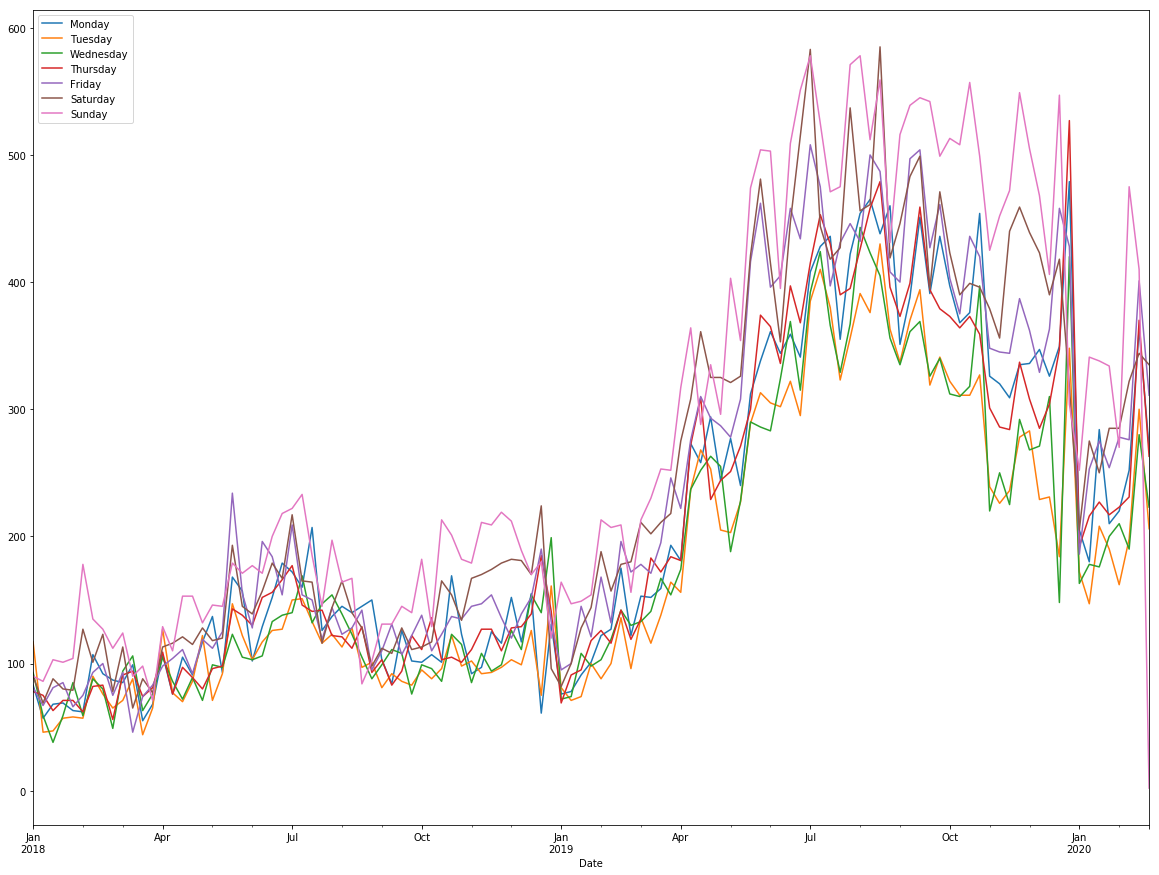

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ts = pd.DataFrame(pd.read_csv('bookings_df_29_02.csv', header=0, parse_dates=['Date'], index_col=1,encoding = 'unicode_escape', squeeze=True).iloc[::-1]['bookings'])
#ts = ts.iloc[:-1, :]

ts['weekday'] = ts.index.weekday
fig, ax = plt.subplots(figsize=(20,15))
ts.groupby('weekday').agg(lambda x: x['bookings'].plot(ax=ax,
                                                       legend=True,
                                                       label=x.index.weekday_name[0]))

plt.show()

In [11]:
series = pd.read_csv('bookings_df_29_02.csv', header=0, parse_dates=['Date'], index_col=1,encoding = 'unicode_escape', squeeze=True).iloc[::-1]['bookings']
#series = series.iloc[:-1]
series.tail()

Date
2020-02-26    223.0003
2020-02-27    263.0005
2020-02-28    310.9999
2020-02-29    335.0001
2020-03-01      2.0000
Name: bookings, dtype: float64

In [12]:
series

Date
2018-01-01     83.0000
2018-01-02    117.0000
2018-01-03     93.0000
2018-01-04     78.0000
2018-01-05     81.0000
                ...   
2020-02-26    223.0003
2020-02-27    263.0005
2020-02-28    310.9999
2020-02-29    335.0001
2020-03-01      2.0000
Name: bookings, Length: 791, dtype: float64

In [13]:
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot

groups = series.groupby(Grouper(freq='W'))
weeks = DataFrame()
for name, group in groups:
#     try:
    weeks[str(name.week) + '-' + str(name.year)] = group.values
#     except:
#         pass

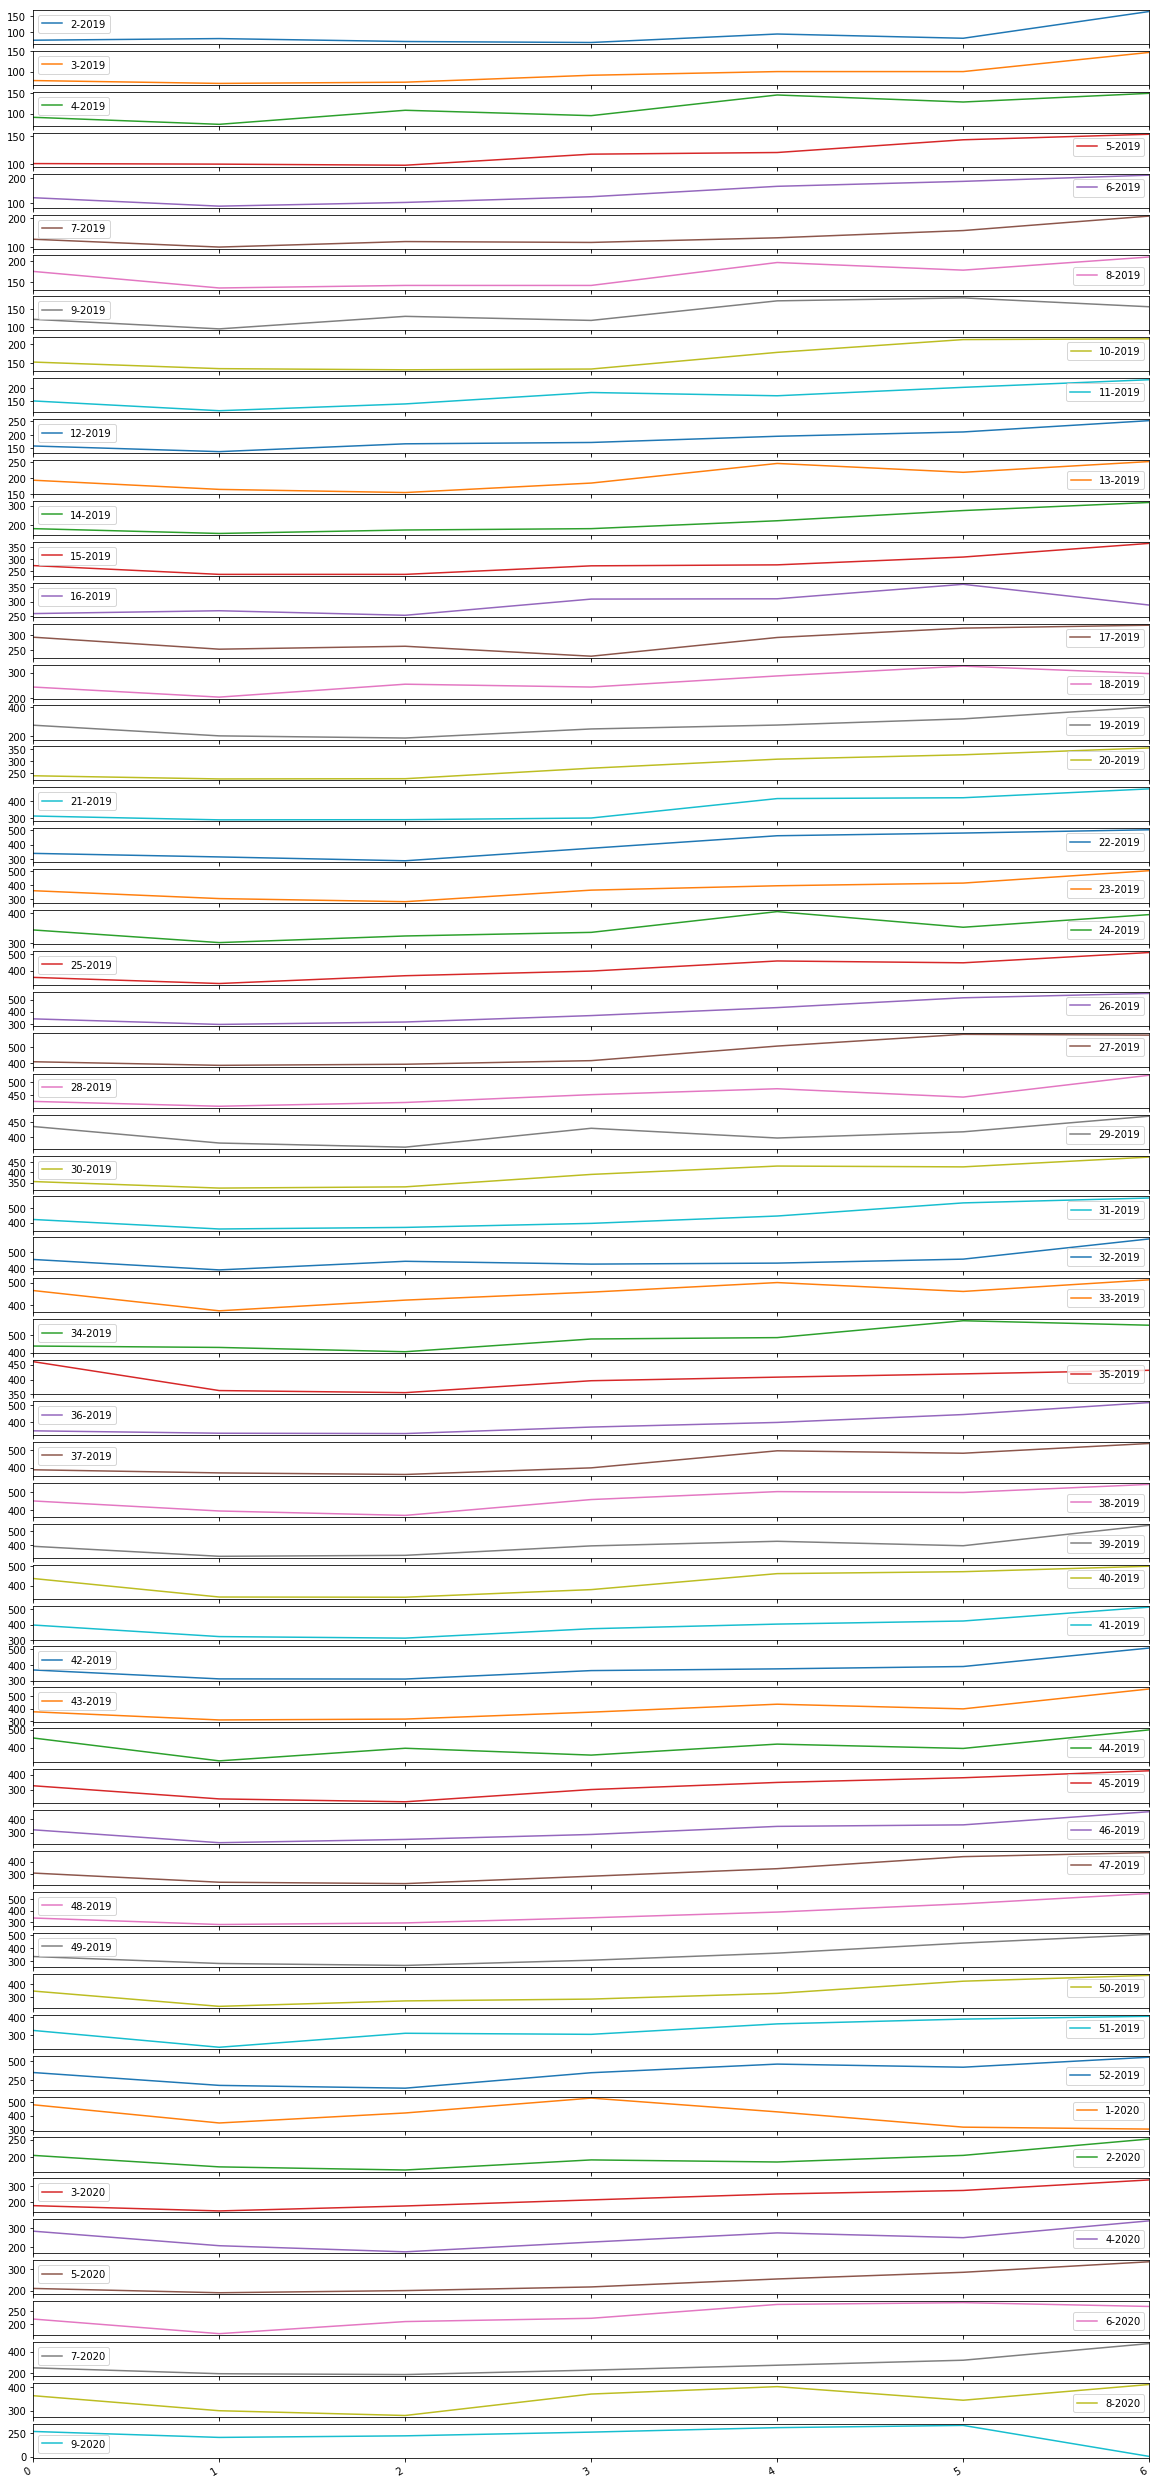

In [14]:
weeks.iloc[:, -60:].plot(subplots=True, legend=True,figsize=(20,50))
pyplot.show()

In [15]:
weeks.columns

Index(['1-2018', '2-2018', '3-2018', '4-2018', '5-2018', '6-2018', '7-2018',
       '8-2018', '9-2018', '10-2018',
       ...
       '52-2019', '1-2020', '2-2020', '3-2020', '4-2020', '5-2020', '6-2020',
       '7-2020', '8-2020', '9-2020'],
      dtype='object', length=113)

In [16]:
weeks

,1-2018,2-2018,3-2018,4-2018,5-2018,6-2018,7-2018,8-2018,9-2018,10-2018,...,52-2019,1-2020,2-2020,3-2020,4-2020,5-2020,6-2020,7-2020,8-2020,9-2020
0,83.0,57.0,68.0,69.0,63.0,62.0,107.0,92.0,87.0,85.0,...,349.4670,479.0006,205.0003,180.0001,284.0002,210.0001,220.0001,252.0002,363.0003,270.0000
1,117.0,46.0,47.0,57.0,58.0,57.0,90.0,76.0,65.0,71.0,...,184.0000,348.0000,172.0000,147.0003,208.0002,190.0000,162.0004,198.0002,300.0005,206.0001
2,93.0,59.0,38.0,59.0,85.0,59.0,88.0,80.0,49.0,94.0,...,148.0001,420.0004,163.0003,178.0001,176.0001,200.0000,210.0003,190.0000,280.0001,223.0003
3,78.0,75.0,63.0,71.0,71.0,62.0,82.0,83.0,56.0,91.0,...,346.9999,527.0006,192.0001,216.0002,227.0006,217.0006,223.0002,231.0001,369.9999,263.0005
4,81.0,67.0,81.0,85.0,66.0,75.0,93.0,100.0,75.0,93.0,...,458.0004,428.0002,185.9999,253.0000,275.0002,254.0000,278.0001,276.0002,401.0005,310.9999
5,90.0,69.0,88.0,80.0,79.0,127.0,101.0,123.0,78.0,113.0,...,418.0000,318.0003,205.0003,275.0004,249.9999,285.0008,285.0001,321.9999,344.0004,335.0001
6,90.0,86.0,103.0,101.0,104.0,178.0,135.0,127.0,112.0,124.0,...,547.0003,304.0001,252.0003,341.0001,338.0000,334.0003,270.0000,475.0004,410.0003,2.0000


In [17]:
weeks.iloc[:, -20:]

,42-2019,43-2019,44-2019,45-2019,46-2019,47-2019,48-2019,49-2019,50-2019,51-2019,52-2019,1-2020,2-2020,3-2020,4-2020,5-2020,6-2020,7-2020,8-2020,9-2020
0,368.0005,375.9999,454.0004,326.0004,320.0011,309.0002,335.0011,336.0003,346.9998,326.0004,349.4670,479.0006,205.0003,180.0001,284.0002,210.0001,220.0001,252.0002,363.0003,270.0000
1,311.0003,311.0002,327.0003,239.0001,225.9999,236.0002,278.0003,283.0007,229.0001,231.0004,184.0000,348.0000,172.0000,147.0003,208.0002,190.0000,162.0004,198.0002,300.0005,206.0001
2,310.0003,318.0002,396.9998,220.0002,250.0001,225.0002,292.0005,268.0009,271.0003,310.0000,148.0001,420.0004,163.0003,178.0001,176.0001,200.0000,210.0003,190.0000,280.0001,223.0003
3,364.0004,373.0001,359.0001,300.9998,285.9999,284.0005,337.0002,308.0001,285.0005,304.0000,346.9999,527.0006,192.0001,216.0002,227.0006,217.0006,223.0002,231.0001,369.9999,263.0005
4,375.0006,436.0003,420.0001,348.0002,345.0003,344.0004,387.0004,362.0006,328.9999,363.0007,458.0004,428.0002,185.9999,253.0000,275.0002,254.0000,278.0001,276.0002,401.0005,310.9999
5,390.0003,399.0004,396.0006,379.0004,356.0002,440.0005,459.0005,439.0007,423.0000,390.0004,418.0000,318.0003,205.0003,275.0004,249.9999,285.0008,285.0001,321.9999,344.0004,335.0001
6,508.0004,557.0008,499.0002,425.0002,452.0000,472.0005,549.0012,505.0013,468.0002,406.0006,547.0003,304.0001,252.0003,341.0001,338.0000,334.0003,270.0000,475.0004,410.0003,2.0000
